# Avaliação 1

## Descrição da base de dados escolhida

### O que signigica cada linha de cada arquivo?
$R:$ A base explorada neste trabalho é composta por três diferentes conjuntos: avaliações (ratings.csv), taggings (tags.csv) e informação sobre os filmes (movies.csv). A ligação entre as bases é feita através de dois tipos de identificadores, o ID dos usuários e o ID dos filmes. 

A marcação de data utilizada nas bases de avaliação e tagging se referem a quantidade de segundos desde 1 de janeiro de 1970 (Unix Epoch).

Cada observação do **conjunto de avaliações** representa uma nota (rating) de um filme (movieId) atribuída por um determinado usuário (userId) junto com a data da avaliação (timestamp). Já no **conjunto de taggings**, cada linha é composta por uma tag livre (tag) definida por um usuário (userId) para um determinado filme (movieId) em uma determinada data (timestamp). O **conjunto de filmes** apresenta um filme (movieId), o titulo junto ao ano (title) e os generos em que o mesmo se encaixa (genres). 

### Quais são os principais atributos (colunas) e seus tipos?
$R:$ Os principais atributos são os IDs dos filmes e dos usuários, que permitem a ligação entre as tabelas permitindo a geração de análises mais claras através da união das informações. Generos e Tags são variáveis categoricas, enquanto os IDs são variáveis contí

## Preparação da base de Dados

### Teve dificuldades para preparar o dataset para uso? (nomes ruins para colunas, arquivos dos datasets não possuíam boa organização?)
$R:$ 

### Aplicou algum pré-processamento nos dados?
$R:$ Sim, para a Pergunta 1 da Seção de Análise Exploratória 




## Análise Exploratória

In [1]:
# Carregando bibliotecas
import pandas as pd
import os 

### Loading MovieLens DFs

In [2]:
# Getting current working directory
main_path = os.getcwd()

# Building file paths 
path_movielens_movies = main_path + '/movielens/movies.csv'
path_movielens_ratings = main_path + '/movielens/ratings.csv'
path_movielens_tags = main_path + '/movielens/tags.csv'

# Loading files into DFs
df_movies = pd.read_csv(path_movielens_movies)
df_ratings = pd.read_csv(path_movielens_ratings)
df_tags = pd.read_csv(path_movielens_tags)

### Checking DFs

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Pergunta 1 – Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

#### Pre processing

In [6]:
# Testing regex logic to get year 
import re

def get_year_from_raw_title(raw_title):
    regex_exp = re.compile('\((....)\)')
    try:
        return int(re.sub('[()]', '', re.search(regex_exp, raw_title).group()))
    except: 
        return None

movie_list_for_test = list(df_movies.sample(n=5).title)

for movie in movie_list_for_test:
    print(f" Raw Title: {movie}\nMovie Year: {get_year_from_raw_title(movie)}\n")

 Raw Title: Miracle of Morgan's Creek, The (1944)
Movie Year: 1944

 Raw Title: Sunshine (2007)
Movie Year: 2007

 Raw Title: Krays, The (1990)
Movie Year: 1990

 Raw Title: It's a Very Merry Muppet Christmas Movie (2002)
Movie Year: 2002

 Raw Title: Girl with the Dragon Tattoo, The (2011)
Movie Year: 2011



In [7]:
# Testing regex logic to remove year from title 

def remove_year_from_raw_title(raw_title):
    regex_exp = re.compile('\((....)\)')
    try:
        title = re.sub(regex_exp, '', raw_title)
    except: 
        return raw_title
    return title

movie_list_for_test = list(df_movies.sample(n=5).title)

for movie in movie_list_for_test:
    print(f"Old Title: {movie}\nNew Title: {remove_year_from_raw_title(movie)}\n")

Old Title: Amy (2015)
New Title: Amy 

Old Title: Zootopia (2016)
New Title: Zootopia 

Old Title: Disclosure (1994)
New Title: Disclosure 

Old Title: Elf (2003)
New Title: Elf 

Old Title: Doors, The (1991)
New Title: Doors, The 



In [8]:
# Pre Procesing Data
# Creating 'year' column and adjusting the title - Movie DF

# Extracting Years
years = []
for title in df_movies['title']:
    years.append(get_year_from_raw_title(title))

# Removing year from title
titles = []
for title in df_movies['title']:
    titles.append(remove_year_from_raw_title(title))

# Creating new DF with title normalized and 'year' column
df_movies_title_normalized_year_column = df_movies[['movieId','title']]
df_movies_title_normalized_year_column['year'] = years
df_movies_title_normalized_year_column['title'] = titles
df_movies_title_normalized_year_column.head()

,movieId,title,year
0,1,Toy Story,1995.0
1,2,Jumanji,1995.0
2,3,Grumpier Old Men,1995.0
3,4,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II,1995.0


In [9]:
# AVG Rate

df_ratings_groupby_movieId_with_mean_rating = df_ratings.groupby('movieId').mean()[['rating']].round(2)
df_ratings_groupby_movieId_with_mean_rating.head()

,rating
movieId,
1,3.92
2,3.43
3,3.26
4,2.36
5,3.07


#### Cálculo

In [10]:
# Merging rating DF with Title and Year DF

df_movie_ratings_merged = pd.merge(df_ratings_groupby_movieId_with_mean_rating, df_movies_title_normalized_year_column, how = 'inner', on = 'movieId')

correlation = df_movie_ratings_merged['rating'].corr(df_movie_ratings_merged['year'])
print(f'Correlation Coefficient: {round(correlation, 2)}')

Correlation Coefficient: -0.11


$R:$ Coeficiente de correlação: -0.11. Há pouco indício de correlação

### Pergunta 2 – Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes?

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Analisando a base de Ratings

In [12]:
# Olhando os dados novamente
df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Contando a quantos filmes cada usuário avaliou para checar sua a diferença da média com mediana e o desvio padrão.
df_ratings_rate_count_by_userid = df_ratings.value_counts('userId').to_frame().reset_index()
df_ratings_rate_count_by_userid.columns =  ['userId','ratedMovies']
df_ratings_rate_count_by_userid.head()

# min max scaler

,userId,ratedMovies
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346


In [14]:
user_rate_count_rate_stats = df_ratings_rate_count_by_userid.ratedMovies.describe()
user_rate_count_rate_stats

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: ratedMovies, dtype: float64

Text(0.5, 0, 'Quantidade de Classificações de Filmes por Usuário')

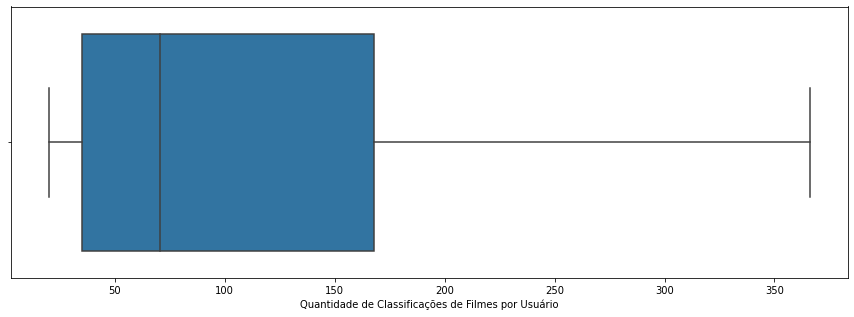

In [15]:
# Avaliação visual dos quartis para entender a distribuição do dado.
plt.figure(figsize=(15, 5))
fig = sns.boxplot(x=df_ratings_rate_count_by_userid['ratedMovies'], showfliers=False)
plt.xlabel("Quantidade de Classificações de Filmes por Usuário")


Text(0.5, 0, 'Quantidade de Classificações de Filmes por Usuário')

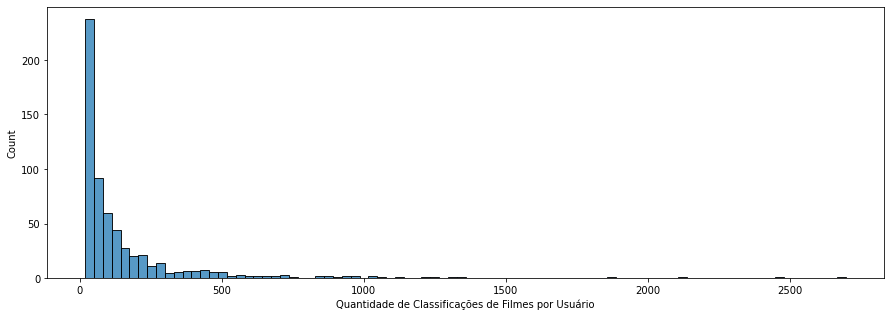

In [16]:
# Avaliação visual dos quartis para entender a distribuição do dado.
plt.figure(figsize=(15, 5))
fig = sns.histplot(data=df_ratings_rate_count_by_userid, x='ratedMovies')
plt.xlabel("Quantidade de Classificações de Filmes por Usuário")


#### Analisando a base de Tags

In [17]:
# Olhando a base de tags
df_tags.info()
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
# Contando a quantos filmes cada usuário avaliou para checar sua a diferença da média com mediana e o desvio padrão.
df_tag_count_by_userid = df_tags.value_counts('userId').to_frame().reset_index()
df_tag_count_by_userid.columns =  ['userId','taggedMovies']
df_tag_count_by_userid.head()

,userId,taggedMovies
0,474,1507
1,567,432
2,62,370
3,599,323
4,477,280


In [19]:
df_tag_count_by_userid.taggedMovies.describe()

count      58.000000
mean       63.500000
std       215.118103
min         1.000000
25%         2.250000
50%         4.000000
75%        13.000000
max      1507.000000
Name: taggedMovies, dtype: float64

Text(0.5, 0, 'Quantidade de Avaliações a Filmes por Usuário')

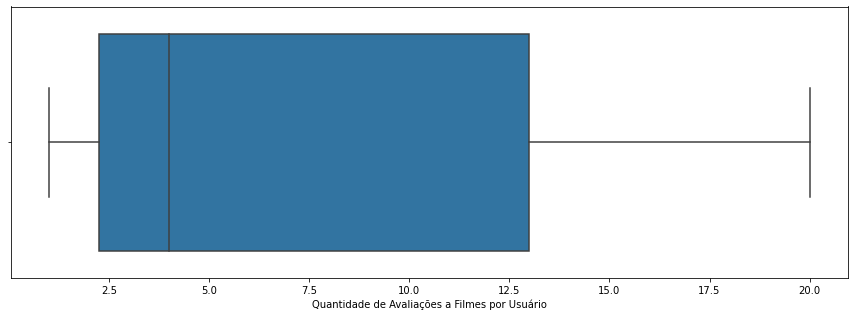

In [20]:
# Avaliação visual dos quartis para entender a distribuição do dado.
plt.figure(figsize=(15, 5))
sns.boxplot(x=df_tag_count_by_userid['taggedMovies'], showfliers=False)
plt.xlabel("Quantidade de Avaliações a Filmes por Usuário")

<AxesSubplot:xlabel='ratedMovies', ylabel='Count'>

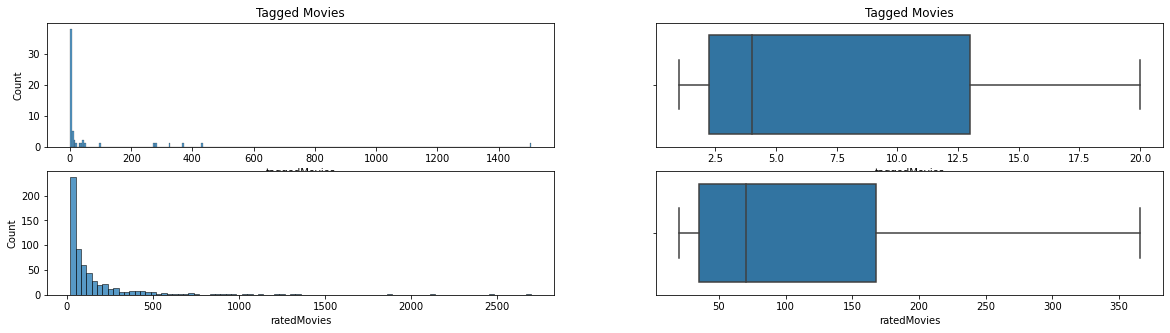

In [39]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,5))
sns.boxplot(x=df_tag_count_by_userid['taggedMovies'], showfliers=False, ax=axs[0,1])
axs[0,1].set_title('Tagged Movies')

sns.histplot(data=df_tag_count_by_userid, x='taggedMovies', ax=axs[0,0])
axs[0,0].set_title('Tagged Movies')

sns.boxplot(x=df_ratings_rate_count_by_userid['ratedMovies'], showfliers=False, ax=axs[1,1])

sns.histplot(data=df_ratings_rate_count_by_userid, x='ratedMovies', ax=axs[1,0])

In [ ]:
from sklearn import preprocessing


normalized_taggedMovies=(df_tag_count_by_userid.taggedMovies-df_tag_count_by_userid.taggedMovies.min())/(df_tag_count_by_userid.taggedMovies.max()-df_tag_count_by_userid.taggedMovies.min())

df_tag_count_by_userid_normalized = df_tag_count_by_userid
df_tag_count_by_userid_normalized.taggedMovies = normalized_taggedMovies

df_tag_count_by_userid_normalized.head()
df_tag_count_by_userid_normalized.taggedMovies.describe()
# ax = sns.boxplot(x=df_tag_count_by_userid_normalized['taggedMovies'], showfliers=False)

$R:$ O grupo mais disperso é o de usuários que rotularam filmes.

### Pergunta 3 – Qual a categoria rotulada mais frequente?

In [41]:
df_movies.head(n=1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [42]:
df_movies_genres_splitted = df_movies.copy()
df_movies_genres_splitted['genres'] = df_movies_genres_splitted['genres'].str.split("|")
df_movies_genres_exploded = df_movies_genres_splitted.explode('genres').reset_index()
df_movies_genres_exploded.query('movieId == 1')

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure
1,0,1,Toy Story (1995),Animation
2,0,1,Toy Story (1995),Children
3,0,1,Toy Story (1995),Comedy
4,0,1,Toy Story (1995),Fantasy


In [43]:
df_movies_exploded_groupby_genres = df_movies_genres_exploded.groupby('genres').count().rename(columns={"index": "frequency"})
df_movies_exploded_groupby_genres['frequency'].sort_values(ascending=False).head()

genres
Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
Name: frequency, dtype: int64

$R:$ A categoria rotulada com maior frequência é 'Drama' com 4361 filmes

### Pergunta 4 – Como estão distribuídas as avaliações ao longo dos anos?

In [44]:
df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [191]:
df_ratings_with_date = df_ratings.copy()
df_ratings_with_date['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s').dt.year
df_ratings_with_date = df_ratings_with_date.rename(columns = {'timestamp': 'date'})
df_ratings_with_date

,userId,movieId,rating,date
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000
...,...,...,...,...
100831,610,166534,4.0,2017
100832,610,168248,5.0,2017
100833,610,168250,5.0,2017
100834,610,168252,5.0,2017


In [193]:
df_ratings_with_date.date.describe()

count    100836.000000
mean       2007.722936
std           6.890376
min        1996.000000
25%        2002.000000
50%        2007.000000
75%        2015.000000
max        2018.000000
Name: date, dtype: float64

Text(0.5, 1.0, 'Distribuição de Avaliações por Ano')

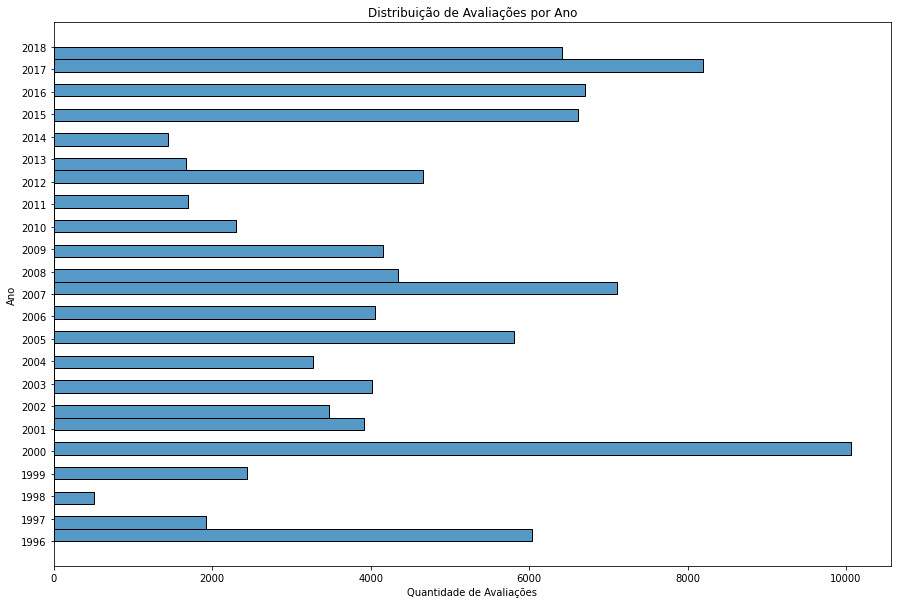

In [223]:
plt.figure(figsize=(15, 10))
sns.histplot(data=df_ratings_with_date, y=df_ratings_with_date['date'])
plt.yticks(np.arange(min(df_ratings_with_date['date']), max(df_ratings_with_date['date'])+1, 1.0))
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Ano')
plt.title('Distribuição de Avaliações por Ano')

$R:$ 

### Pergunta 5 – Qual é a correlação do ano do filme com as avaliações?

In [224]:
df_movies_title_normalized_year_column

,movieId,title,year
0,1,Toy Story,1995.0
1,2,Jumanji,1995.0
2,3,Grumpier Old Men,1995.0
3,4,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II,1995.0
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017.0
9738,193583,No Game No Life: Zero,2017.0
9739,193585,Flint,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple,2018.0


In [210]:
df_ratings_group_by_movie = df_ratings.groupby('movieId').mean('rating').reset_index()[['movieId', 'rating']].round(2)
df_ratings_group_by_movie

,movieId,rating
0,1,3.92
1,2,3.43
2,3,3.26
3,4,2.36
4,5,3.07
...,...,...
9719,193581,4.00
9720,193583,3.50
9721,193585,3.50
9722,193587,3.50


In [ ]:
df_ratings_with_date['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_ratings_with_date = df_ratings_with_date.rename(columns = {'timestamp': 'date'})
df_ratings_grouped_by_date = df_ratings_with_date.groupby('date')

In [225]:
df_movies_with_ratings_and_years = df_movies_title_normalized_year_column.join(df_ratings_group_by_movie.set_index('movieId'), 
                                                                               on='movieId')
df_movies_with_ratings_and_years['year'].corr(df_movies_with_ratings_and_years['rating'])

-0.11117066041299933

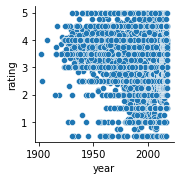

In [234]:
sns.pairplot(data=df_movies_with_ratings_and_years, x_vars='year', y_vars='rating')

### Pergunta 6 – Qual o mês do ano com maior quantidade de avaliações de modo geral?

In [252]:
df_ratings_with_date = df_ratings.copy()
df_ratings_with_date['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s').dt.month
df_ratings_with_date = df_ratings_with_date.rename(columns = {'timestamp': 'month'})
df_ratings_grouped_by_date = df_ratings_with_date.groupby('month').count().reset_index()[['month', 'userId']].rename(columns={'userId':'count'})
df_ratings_grouped_by_date.sort_values('count', ascending=False)

,month,count
4,5,10883
10,11,9676
7,8,9074
2,3,8880
5,6,8825
0,1,8684
8,9,8510
3,4,7727
1,2,7635
9,10,7148


### Pergunta 7 – Quais são os gêneros favoritos? (avaliacao vs genres)

### Pergunta 8 –  

### Pergunta 9 –  

### Pergunta 10 – 